In this notbook you will find:
 - very messy stuff; dont waste time looking at it
 - most of it are just "experiments"

## Data Understanding

### Initial Overview

In [46]:
import pandas as pd
# %pip install autoviz
#from autoviz.AutoViz_Class import AutoViz_Class
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    precision_recall_curve, roc_auc_score, confusion_matrix, classification_report, auc
)

In [47]:
pwd()

'c:\\Users\\felix\\OneDrive\\Dokumente\\FU_Working\\ApplAna\\FallPredictionPoetry\\repos\\Applied-Science-Portfoliolio'

In [51]:
path = "C:\\Users\\felix\\OneDrive\\Dokumente\\FU_Working\\ApplAna\\FallPredictionPoetry\\data\\kip_sdm_syn.csv"
df = pd.read_csv(path, sep=",")

In [52]:
# Split into train (80%) and test (20%)
df, test_df = train_test_split(df, test_size=0.1, stratify=df["fallen"], random_state=42)

In [53]:
df.head()

,fallen,id,age,procedure,diagnosis,c_zriserh1,decubitus-admission,decubitus-at_the_moment,bed_mobility-impairment,bed_mobility-jones,...,cognition-disoriented_time,cognition-disoriented_location,cognition-disoriented_own_person,cognition-agitated,cognition-confused,psychotropic_or_sedatives_drugs,decubitus-risk,fall-risk,diseases,sex
6690,False,77363,49,0,G453,False,NaN,False,False,NaN,...,False,False,False,False,False,NaN,NaN,0,NaN,male
35722,False,80749,34,1-10,A010,True,NaN,NaN,NaN,NaN,...,False,False,False,False,False,NaN,NaN,NaN,NaN,female
32809,False,23355,39,0,J110,False,NaN,False,False,NaN,...,False,False,False,False,False,NaN,NaN,NaN,NaN,female
10660,False,36660,29,0,S100,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,NaN,NaN,NaN,NaN,female
33450,False,15012,54,8-92,L210,False,NaN,False,NaN,NaN,...,False,False,False,False,False,NaN,NaN,0,NaN,female


Train/Test/Validation Sets

In [54]:
%matplotlib inline

In [55]:
df.columns

Index(['fallen', 'id', 'age', 'procedure', 'diagnosis', 'c_zriserh1',
       'decubitus-admission', 'decubitus-at_the_moment',
       'bed_mobility-impairment', 'bed_mobility-jones',
       'bed_mobility-skin_condition', 'transfer-impairment', 'transfer',
       'medical_items', 'medical_items-arm_or_leg_splint',
       'medical_items-A_V_system', 'medical_items-plaster_or_neck_brace',
       'medical_items-compression_stocking', 'medical_items-ventilation_mask',
       'medical_items-O2_glasses', 'medical_items-orthesis',
       'medical_items-prosthesis',
       'medical_items-skin_condition_at_item_application',
       'fall-last_12_month', 'fall-how_many_last_12_month', 'fall-while_stay',
       'fall-while_transfer', 'walk-impairment', 'walk-jones',
       'walk-balance_and_gait_impaired', 'walking_aid',
       'excretions-impairment', 'excretions-incontinence',
       'excretions-nykturie', 'cognition-impairment',
       'cognition-disoriented_time', 'cognition-disoriented_locati

## Identify Variables with high correlation

### Creating Dummies for Non-Ordinal

In [181]:
df["transfer"].value_counts()

transfer
2     2230
3      492
4A     178
1       96
4B      10
Name: count, dtype: int64

In [65]:
df['transfer'] = df['transfer'].fillna('Unknown')
df = pd.get_dummies(df, columns=['transfer'])


In [66]:
df["bed_mobility-jones"].value_counts()

bed_mobility-jones
2     1678
3      496
4A     139
1       89
4B       5
Name: count, dtype: int64

In [67]:
df['bed_mobility-jones'] = df['bed_mobility-jones'].fillna('Unknown')
df = pd.get_dummies(df, columns=['bed_mobility-jones'])

In [68]:
df['walk-jones'] = df['walk-jones'].fillna('Unknown')
df = pd.get_dummies(df, columns=['walk-jones'])

In [69]:
df['decubitus-risk'] = df['decubitus-risk'].fillna('Unknown')
df = pd.get_dummies(df, columns=['decubitus-risk'])

In [70]:
df['fall-risk'] = df['fall-risk'].fillna('Unknown')
df = pd.get_dummies(df, columns=['fall-risk'])

## Always Execute

In [9]:
df['procedure'] = df['procedure'].fillna('Unknown')
df = pd.get_dummies(df, columns=['procedure'])

In [10]:
df['diagnosis'] = df['diagnosis'].fillna('Unknown')
df = pd.get_dummies(df, columns=['diagnosis'])

In [11]:
df['sex'] = df['sex'].fillna('Unknown')
df = pd.get_dummies(df, columns=['sex'])

### Creating Ordinal

In [12]:
df["transfer"] = OrdinalEncoder().fit_transform(df[["transfer"]])

In [13]:
df["transfer"].value_counts()

transfer
1.0    2016
2.0     436
3.0     166
0.0      86
4.0      10
Name: count, dtype: int64

In [14]:
df["bed_mobility-jones"] = OrdinalEncoder().fit_transform(df[["bed_mobility-jones"]])

In [15]:
df["decubitus-risk"] = OrdinalEncoder().fit_transform(df[["decubitus-risk"]])

In [16]:
df["fall-risk"] = OrdinalEncoder().fit_transform(df[["fall-risk"]])

In [17]:
df["walk-jones"] = OrdinalEncoder().fit_transform(df[["walk-jones"]])

In [18]:
df["decubitus-admission"] = df["decubitus-admission"].astype("boolean")
df["decubitus-at_the_moment"] = df["decubitus-at_the_moment"].astype("boolean")
df["bed_mobility-impairment"] = df["bed_mobility-impairment"].astype("boolean")
df["bed_mobility-skin_condition"] = df["bed_mobility-skin_condition"].astype("boolean")
df["transfer-impairment"] = df["transfer-impairment"].astype("boolean")
df["medical_items"] = df["medical_items"].astype("boolean")
df["medical_items-skin_condition_at_item_application"] = df["medical_items-skin_condition_at_item_application"].astype("boolean")
df["fall-last_12_month"] = df["fall-last_12_month"].astype("boolean")
df["fall-while_stay"] = df["fall-while_stay"].astype("boolean")
df["fall-while_transfer"] = df["fall-while_transfer"].astype("boolean")
df["walk-impairment"] = df["walk-impairment"].astype("boolean")
df["excretions-impairment"] = df["excretions-impairment"].astype("boolean")
df["cognition-impairment"] = df["cognition-impairment"].astype("boolean")
df["psychotropic_or_sedatives_drugs"] = df["psychotropic_or_sedatives_drugs"].astype("boolean")
df["diseases"] = df["diseases"].astype("boolean")

### Additional encodings to fix NaNs

In [19]:
df["fall-how_many_last_12_month_missing"] = df["fall-how_many_last_12_month"].isna().astype(int)

In [20]:
df['fall-while_stay'] = df['fall-while_stay'].astype('object').fillna('Unknown')
df = pd.get_dummies(df, columns=['fall-while_stay'])

In [21]:
df['transfer-impairment'] = df['transfer-impairment'].astype('object').fillna('Unknown')
df = pd.get_dummies(df, columns=['transfer-impairment'])

In [22]:
df['bed_mobility-impairment'] = df['bed_mobility-impairment'].astype('object').fillna('Unknown')
df = pd.get_dummies(df, columns=['bed_mobility-impairment'])

### Hot Deck Encoding

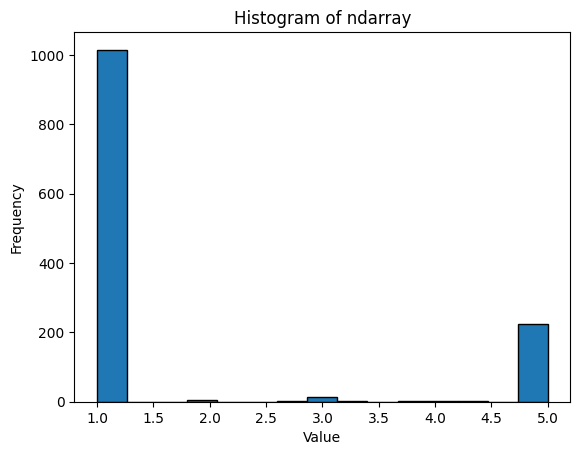

In [23]:
plt.hist(df["fall-how_many_last_12_month"], bins=15, edgecolor='black')  # Increase bins for finer granularity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of ndarray")
plt.show()

In [24]:
# Step 1: Copy the column to a new column
df['fall_scrambled'] = df['fall-how_many_last_12_month'].copy()

# Step 2: Remove missing values and randomly shuffle the column
non_missing_values = df['fall_scrambled'].dropna().sample(frac=1, random_state=42).values  # Shuffle

# Step 3: Replicate values so that there are as many as needed
num_missing = df['fall-how_many_last_12_month'].isna().sum()
replicated_values = np.tile(non_missing_values, (num_missing // len(non_missing_values) + 1))[:num_missing]

# Step 4: Join the scrambled column with the original DataFrame
df.loc[df['fall-how_many_last_12_month'].isna(), 'fall-how_many_last_12_month'] = replicated_values

# Step 5: Drop the scrambled column (optional)
df.drop(columns=['fall_scrambled'], inplace=True)

# Check if missing values are imputed
print(df['fall-how_many_last_12_month'].isna().sum())  # Should be 0 if all NaNs were filled

0


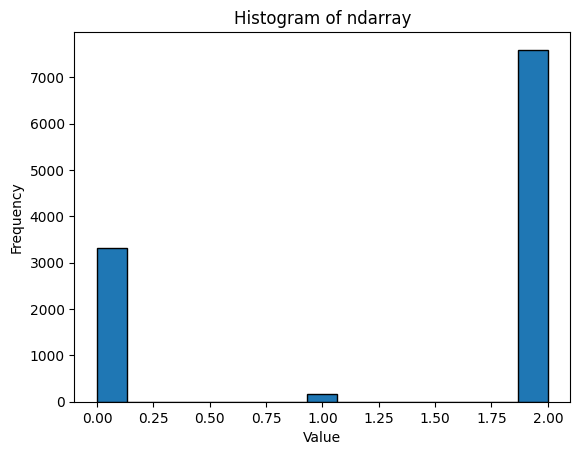

In [25]:
plt.hist(df["fall-risk"], bins=15, edgecolor='black')  # Increase bins for finer granularity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of ndarray")
plt.show()

In [26]:
# Step 1: Copy the column to a new column
df['fall-risk_scrambled'] = df['fall-risk'].copy()

# Step 2: Remove missing values and randomly shuffle the column
non_missing_values = df['fall-risk_scrambled'].dropna().sample(frac=1, random_state=42).values  # Shuffle

# Step 3: Replicate values so that there are as many as needed
num_missing = df['fall-risk'].isna().sum()
replicated_values = np.tile(non_missing_values, (num_missing // len(non_missing_values) + 1))[:num_missing]

# Step 4: Join the scrambled column with the original DataFrame
df.loc[df['fall-risk'].isna(), 'fall-risk'] = replicated_values

# Step 5: Drop the scrambled column (optional)
df.drop(columns=['fall-risk_scrambled'], inplace=True)

# Check if missing values are imputed
print(df['fall-risk'].isna().sum())  # Should be 0 if all NaNs were filled

0


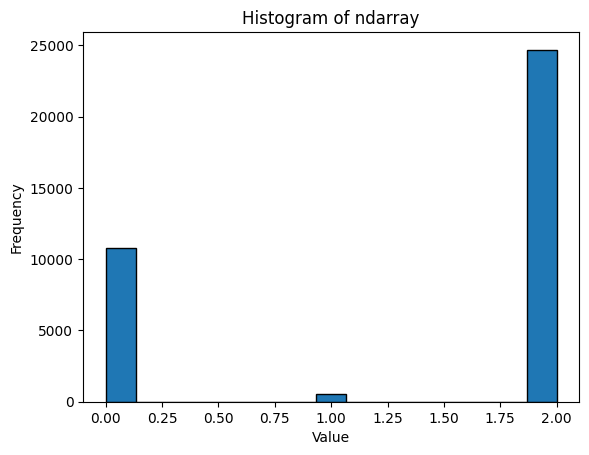

In [27]:
plt.hist(df["fall-risk"], bins=15, edgecolor='black')  # Increase bins for finer granularity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of ndarray")
plt.show()

Musst du probably für die andren Ordinals auch machen!

In [28]:
types = (df.dtypes).to_string()
print(types)

fallen                                                 bool
id                                                    int64
age                                                   int64
c_zriserh1                                             bool
decubitus-admission                                 boolean
decubitus-at_the_moment                             boolean
bed_mobility-jones                                  float64
bed_mobility-skin_condition                         boolean
transfer                                            float64
medical_items                                       boolean
medical_items-arm_or_leg_splint                        bool
medical_items-A_V_system                               bool
medical_items-plaster_or_neck_brace                    bool
medical_items-compression_stocking                     bool
medical_items-ventilation_mask                         bool
medical_items-O2_glasses                               bool
medical_items-orthesis                  

In [220]:
df.head()

,fallen,id,age,c_zriserh1,decubitus-admission,decubitus-at_the_moment,bed_mobility-impairment,bed_mobility-jones,bed_mobility-skin_condition,transfer-impairment,...,diagnosis_Z954,diagnosis_Z955,diagnosis_Z958,diagnosis_Z965,diagnosis_Z966,diagnosis_Z978,diagnosis_Z981,diagnosis_Z990,sex_female,sex_male
0,False,179020,39,False,<NA>,<NA>,<NA>,NaN,<NA>,False,...,False,False,False,False,False,False,False,False,True,False
1,False,112009,29,False,False,<NA>,<NA>,NaN,<NA>,<NA>,...,False,False,False,False,False,False,False,False,False,True
2,False,54403,29,False,<NA>,False,<NA>,NaN,<NA>,<NA>,...,False,False,False,False,False,False,False,False,True,False
3,False,13054,64,True,<NA>,<NA>,<NA>,NaN,<NA>,False,...,False,False,False,False,False,False,False,False,False,True
4,False,45770,89,False,<NA>,False,<NA>,NaN,<NA>,<NA>,...,False,False,False,False,False,False,False,False,False,True


In [221]:
df["diagnosis_T780"].value_counts()

diagnosis_T780
False    39997
True         3
Name: count, dtype: int64

The dummy-variables for the diagnosis and and procedure create many dimensions. Lets check how they are correlated with the target variable. 

In [27]:
pd.set_option('display.max_rows', 100)

### Correlation for ordinal Variables

In [223]:
df['bed_mobility-jones'].corr(df['fallen'], method='pearson')

np.float64(0.07490126851394266)

In [195]:
df['transfer'].corr(df['fallen'], method='pearson')

np.float64(0.09865870001690472)

In [196]:
df['decubitus-risk'].corr(df['fallen'], method='pearson')

np.float64(-0.11234932335341297)

In [197]:
df['fall-risk'].corr(df['fallen'], method='pearson')

np.float64(-0.13369303910524222)

In [233]:
df['walk-jones'].corr(df['fallen'], method='pearson')

np.float64(0.001212379788567742)

### Computing Correlation

#### Continuous variables will be computed with Pearson Correlation

Quick comment: Computing correlation between continuous variables and binary (fallen) is trickier than I thought. Becomes even more trickier when variable is not normal, which is the case for "fall-how_many_last_12_month". Becomes EVEN more tricker if the target is heavily skewed. Also we have to keep in midn the small sample size to compute the correlation for some variables due to the high sparsity. Ask GPT for more info. We have to start somehwere though. Just take the results with a grain of salt. This might explain why age has little correlation here despite Rahels' comment that it should be highly correlated.

In [234]:
df['age'].corr(df['fallen'], method='pearson')

np.float64(0.0610795874402941)

In [235]:
df['fall-how_many_last_12_month'].corr(df['fallen'], method='pearson')

np.float64(0.19839728689176075)

#### Binary Variables will be computed with Phi-Coefficient correlation

In [236]:
def phi_coefficient(df, var, target="fallen"):
    contingency_table = pd.crosstab(df[var], df[target])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = df.shape[0]
    return np.sqrt(chi2 / n)

binary_vars = [col for col in df.columns if df[col].nunique() == 2]  # Identify binary columns
phi_corrs = {var: phi_coefficient(df, var) for var in binary_vars}

# Sort by absolute correlation value
sorted_phi_corrs = sorted(phi_corrs.items(), key=lambda x: abs(x[1]), reverse=True)

In [237]:
print(sorted_phi_corrs[:20])

[('fallen', np.float64(0.9947243123470876)), ('walk-balance_and_gait_impaired', np.float64(0.2544253300451488)), ('fall-while_stay_True', np.float64(0.2516941347185581)), ('excretions-incontinence', np.float64(0.16817591552775144)), ('transfer-impairment_True', np.float64(0.1544248287901121)), ('bed_mobility-impairment_True', np.float64(0.13594417687408805)), ('walking_aid', np.float64(0.10305135534987699)), ('cognition-agitated', np.float64(0.10008239657712259)), ('excretions-impairment', np.float64(0.09756496858687992)), ('cognition-impairment', np.float64(0.09459997362940999)), ('fall-while_transfer', np.float64(0.08306222833992838)), ('cognition-disoriented_time', np.float64(0.08186995811549992)), ('walk-impairment', np.float64(0.08021941492403456)), ('fall-last_12_month', np.float64(0.07468782913051196)), ('cognition-disoriented_location', np.float64(0.07332298124415225)), ('cognition-disoriented_own_person', np.float64(0.0673987434723888)), ('cognition-confused', np.float64(0.063

In [27]:
df["walk-balance_and_gait_impaired"].value_counts()

walk-balance_and_gait_impaired
False    38596
True      1404
Name: count, dtype: int64

In [28]:
df["excretions-incontinence"].value_counts()

excretions-incontinence
False    39272
True       728
Name: count, dtype: int64

In [29]:
df["fall-while_stay"].value_counts()

fall-while_stay
False    2719
True       69
Name: count, dtype: int64

In [40]:
df["fallen"].value_counts()

fallen
False    39905
True        95
Name: count, dtype: int64

In [30]:
df["walking_aid"].value_counts()

walking_aid
False    39067
True       933
Name: count, dtype: int64

In [31]:
df['cognition-agitated'].value_counts()

cognition-agitated
False    39909
True        91
Name: count, dtype: int64

In [32]:
df['excretions-impairment'].value_counts()

excretions-impairment
False    9314
True      769
Name: count, dtype: int64

In [33]:
df["fall-how_many_last_12_month"].value_counts()

fall-how_many_last_12_month
1.000000    1122
5.000000     249
3.000000      11
2.000000       3
3.392226       1
2.748724       1
4.931584       1
3.100813       1
3.871862       1
3.659762       1
2.981188       1
1.257659       1
3.241220       1
4.396037       1
4.096168       1
2.013521       1
2.202339       1
4.453497       1
4.175363       1
Name: count, dtype: int64

'fall-while_stay', 'fall-how_many_last_12_month', 'excretions-impairment' will need to be imputed due to sparsity. Lets start with 'fall-how_many_last_12_month'.

Try hot-deck imputation and 'Unknown'. Also try to create feautures for similar categories (cognition, excretions, walk-impairment) to achievee higher correlations.

In [248]:
df['fall-how_many_last_12_month'].corr(df['fallen'], method='pearson')

np.float64(0.016472610111042518)

Succesfull imputation with HotDeck Imputation. Care for low correlation. We will leave it like this for the time.

### Das Zeug hast du am Sonntag nicht ausgeführt!

In [53]:
df['excretions-impairment'].value_counts()

excretions-impairment
False    9314
True      769
Name: count, dtype: int64

In [54]:
# Fill missing values with the mode (most frequent value)
df['excretions-impairment'] = df['excretions-impairment'].fillna(df['excretions-impairment'].mode()[0])

In [59]:
df['excretions-impairment'].value_counts()

excretions-impairment
False    39231
True       769
Name: count, dtype: int64

## Visualizations to explain effects

In [ ]:
df_viz = df1.copy()

# Define age bins
age_bins = range(18, 85, 10)  # 18-27, 28-37, ..., 78-84
df['age_group'] = pd.cut(df['age'], bins=age_bins, right=False)

# Count occurrences of 0 and 1 per age group
age_counts = df.groupby('age_group')['binary_var'].value_counts().unstack(fill_value=0)

# Normalize to percentages
age_percent = age_counts.div(age_counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
age_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Labels and customization
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Distribution of Age with Binary Variable Proportion")
plt.legend(["0", "1"], title="Binary Variable")
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.show()

### Model Building

In [62]:
selected_features = [
	"walk-balance_and_gait_impaired",
	"excretions-incontinence",
	"fall-while_stay",
	"walking_aid",
	"cognition-agitated",
	"excretions-impairment",
	"fall-how_many_last_12_month",
	"age",
 	"fallen"
]

df_model = df[selected_features]

df_model.head

<bound method NDFrame.head of        walk-balance_and_gait_impaired  excretions-incontinence  \
0                   False                       False            
1                   False                       False            
2                   False                       False            
3                   False                        True            
4                   False                       False            
...                               ...                      ...   
39995               False                       False            
39996               False                       False            
39997               False                       False            
39998               False                       False            
39999               False                       False            

      fall-while_stay  walking_aid  cognition-agitated  excretions-impairment  \
0             NaN         False            False                False           
1             N

In [66]:
!pip install torch

In [70]:
# !pip install --upgrade xgboost
# !pip install --upgrade scikit-learn
# !pip show xgboost scikit-learn

!pipx install poetry

⣽ installing poetrylibrariesnt  installed package poetry 2.1.1, installed using Python 3.13.2
  These apps are now globally available
    - poetry
⚠️  Note: '/Users/fyudris/.local/bin' is not on your PATH environment
    variable. These apps will not be globally accessible until your PATH is
    updated. Run `pipx ensurepath` to automatically add it, or manually modify
    your PATH in your shell's config file (e.g. ~/.bashrc).
done! ✨ 🌟 ✨


In [71]:
# %pip install autogluon

from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_data, test_data = train_test_split(df_model, test_size=0.2, random_state=42)

# Define the target variable
target = 'fallen'

# Initialize the TabularPredictor
predictor = TabularPredictor(label=target, eval_metric='recall', verbosity=2)

# Train the model
predictor.fit(train_data=train_data, time_limit=600)  # Adjust time_limit as needed

# Display leaderboard
leaderboard = predictor.leaderboard(test_data)
print(leaderboard)


# # Define the target variable
# target = 'fallen'

# # Initialize the TabularPredictor
# predictor = TabularPredictor(label=target, eval_metric='recall', verbosity=2)

# # Train the model
# predictor.fit(train_data=df_model, time_limit=600)  # Adjust time_limit as needed

# # Display leaderboard
# leaderboard = predictor.leaderboard()
# print(leaderboard)



No path specified. Models will be saved in: "AutogluonModels/ag-20250320_145537"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.2.0: Wed Nov 15 21:53:34 PST 2023; root:xnu-10002.61.3~2/RELEASE_ARM64_T8103
CPU Count:          8
Memory Avail:       4.10 GB / 16.00 GB (25.6%)
Disk Space Avail:   235.80 GB / 460.43 GB (51.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy.

          model          score_test  score_val eval_metric  pred_time_test  \
0       NeuralNetFastAI   1.000000   0.666667     recall       0.083592      
1   WeightedEnsemble_L2   1.000000   0.666667     recall       0.084566      
2      RandomForestGini   0.157895   0.166667     recall       0.085917      
3        ExtraTreesGini   0.157895   0.166667     recall       0.087118      
4        ExtraTreesEntr   0.157895   0.166667     recall       0.088329      
5      RandomForestEntr   0.157895   0.166667     recall       0.091070      
6              LightGBM   0.105263   0.166667     recall       0.003862      
7            LightGBMXT   0.105263   0.166667     recall       0.004441      
8         LightGBMLarge   0.052632   0.166667     recall       0.002852      
9        KNeighborsUnif   0.000000   0.000000     recall       0.080879      
10       KNeighborsDist   0.000000   0.000000     recall       0.081610      

    pred_time_val  fit_time   pred_time_test_marginal  pred_tim

OLD SHIT

In [36]:
correlations = df.corrwith(df["fallen"], method="spearman").abs().sort_values(ascending=False).to_string()
print(correlations)

fallen                                              1.000000
fall-while_stay                                     0.479318
medical_items-skin_condition_at_item_application    0.322410
walk-balance_and_gait_impaired                      0.255821
fall-how_many_last_12_month                         0.202856
excretions-impairment                               0.196862
cognition-impairment                                0.192049
excretions-incontinence                             0.170097
transfer-impairment                                 0.158168
fall-while_transfer                                 0.156993
fall-risk_+                                         0.153170
bed_mobility-impairment                             0.152331
fall-last_12_month                                  0.150537
walk-impairment                                     0.146825
walk-jones_1                                        0.140071
cognition-agitated                                  0.105473
walking_aid             

The varaibles with the highest correlation are very sparse. Lets try to impute them with a model. To check whether this is achievable we look at the correlation between all the variables and the varibel that is to be imputed.

### Creating Correlation Matrix with target that is to be imputed

In [37]:
correlations = df.corrwith(df["fall-while_stay"], method="spearman").abs().sort_values(ascending=False).to_string()
print(correlations)

fall-while_stay                                     1.000000
bed_mobility-skin_condition                         0.765747
medical_items-skin_condition_at_item_application    0.656140
decubitus-at_the_moment                             0.540905
excretions-impairment                               0.482140
fallen                                              0.479318
walk-balance_and_gait_impaired                      0.472672
transfer-impairment                                 0.447844
cognition-impairment                                0.444860
fall-while_transfer                                 0.439008
fall-risk_+                                         0.408964
diseases                                            0.401086
excretions-incontinence                             0.390210
walk-impairment                                     0.387739
cognition-agitated                                  0.380630
bed_mobility-impairment                             0.380144
fall-how_many_last_12_mo

In [38]:
correlations = df.corrwith(df["medical_items-skin_condition_at_item_application"], method="spearman").abs().sort_values(ascending=False).to_string()
print(correlations)

medical_items-skin_condition_at_item_application    1.000000
bed_mobility-skin_condition                         0.761812
decubitus-at_the_moment                             0.760195
fall-while_stay                                     0.656140
bed_mobility-impairment                             0.473211
medical_items                                       0.450092
transfer-impairment                                 0.410209
fall-while_transfer                                 0.403016
fall-risk_+                                         0.375839
medical_items-O2_glasses                            0.374639
walk-impairment                                     0.360180
decubitus-risk_+                                    0.350720
fallen                                              0.322410
walk-balance_and_gait_impaired                      0.290662
procedure_5-21                                      0.261482
diagnosis_B278                                      0.227895
diagnosis_C833          

Unfortunately the most correlated features for "fall-while_stay" and "medical_items-skin_condition_at_item_application", e.g. "bed_mobility-skin_condition" or "decubitus-at_the_moment" are very sparse themselves. This makes it unfeasible to predict them properly. Lets try to create a dummy variable "Unknownw" for cases in which there are NANs in the columns "fall-while_stay" and "medical_items-skin_condition_at_item_application".

In [39]:
df["decubitus-admission"].value_counts()

decubitus-admission
False    9399
Name: count, dtype: int64

In [41]:
# df["transfer"].value_counts()

23.03 HIER GEHT DER SONNTAG LOS

### Exploratory for only fallen dataset

C:\Users\felix\AppData\Local\Temp\ipykernel_28888\1886993880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["fallen"], y=df["age"], palette="coolwarm")


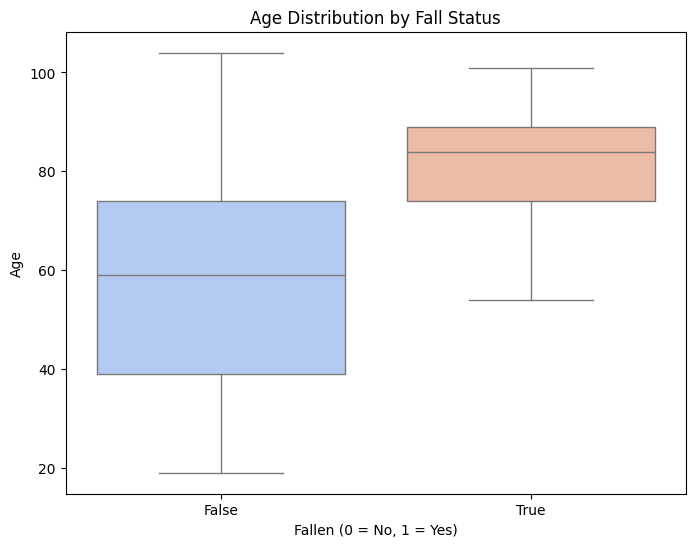

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["fallen"], y=df["age"], palette="coolwarm")
plt.xlabel("Fallen (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age Distribution by Fall Status")
plt.show()


In [30]:
df["transfer-impairment_True"].value_counts()

transfer-impairment_True
False    33895
True      2105
Name: count, dtype: int64

In [31]:
df["bed_mobility-impairment_True"].value_counts()

bed_mobility-impairment_True
False    34367
True      1633
Name: count, dtype: int64

In [ ]:
df.head(100)

In [81]:
df_fallen = df[df["fallen"] == 1]

In [ ]:
df_fallen.head(80)

"bed_mobility-impairment" and "transfer-impairment" are almost always both = 1 if fallen=1.
Wichtige Erkenntnis, kannst du aber nicht mehr nachvollzeihen, weil imputiert für NANs

In [99]:
selected_columns = ["age", "fall-how_many_last_12_month", "fall-while_stay", "fall-risk_Unknown", "fall-risk_+", "fall-risk_++", "transfer-impairment"]  # Adjust column names
df_fallen_subset = df_fallen[selected_columns]

In [109]:
df["fall-risk_0"].value_counts()

fall-risk_0
False    31554
True      8446
Name: count, dtype: int64

In [ ]:
df_fallen_subset.head(80)

Everybody who fell has fall-risk = + but NO ONE had fall risk = ++ ?!

In [50]:
df_fallen_subset.notna().mean() * 100  # Percentage of non-null values per column


age                            100.000000
fall-how_many_last_12_month     14.736842
fall-while_stay                 28.421053
dtype: float64

In [59]:
t = df.notna().mean()*100

In [60]:
t[:50]

fallen                                              100.0000
id                                                  100.0000
age                                                 100.0000
c_zriserh1                                          100.0000
decubitus-admission                                  23.4975
decubitus-at_the_moment                              23.9975
bed_mobility-impairment                              27.8200
bed_mobility-skin_condition                           3.8825
transfer-impairment                                  28.5300
medical_items                                        26.9925
medical_items-arm_or_leg_splint                     100.0000
medical_items-A_V_system                            100.0000
medical_items-plaster_or_neck_brace                 100.0000
medical_items-compression_stocking                  100.0000
medical_items-ventilation_mask                      100.0000
medical_items-O2_glasses                            100.0000
medical_items-orthesis  

The values are way more often present for fallers than for non-fallers

In [90]:
# Create missingness indicator
df["fall-how_many_last_12_month_missing"] = df["fall-how_many_last_12_month"].isna().astype(int)

In [85]:
df["fall-while_stay_missing"] = df["fall-while_stay"].isna().astype(int)

In [91]:
# Replace with your actual column names
missingness_columns = ["fall-how_many_last_12_month_missing", "fall-while_stay_missing"]

# Compute Phi coefficient for both missingness indicator columns
phi_missing_corrs = {col: phi_coefficient(df, col) for col in missingness_columns}

# Convert to DataFrame and sort by absolute correlation value
import pandas as pd
df_phi_missing = pd.DataFrame.from_dict(phi_missing_corrs, orient="index", columns=["Phi Correlation"])
df_phi_missing = df_phi_missing.abs().sort_values(by="Phi Correlation", ascending=False)

print(df_phi_missing)

                                     Phi Correlation
fall-while_stay_missing                     0.040094
fall-how_many_last_12_month_missing         0.028436


### Prediction Decision Tree for Dummy VAriables for Unknown and tested for several cutoffs

Check whether dummy Unknown or Category works better

In [32]:
df.head()

,fallen,id,age,c_zriserh1,decubitus-admission,decubitus-at_the_moment,bed_mobility-jones,bed_mobility-skin_condition,transfer,medical_items,...,fall-how_many_last_12_month_missing,fall-while_stay_False,fall-while_stay_True,fall-while_stay_Unknown,transfer-impairment_False,transfer-impairment_True,transfer-impairment_Unknown,bed_mobility-impairment_False,bed_mobility-impairment_True,bed_mobility-impairment_Unknown
6690,False,77363,49,False,<NA>,False,NaN,<NA>,NaN,<NA>,...,1,False,False,True,False,False,True,True,False,False
35722,False,80749,34,True,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,1,False,False,True,True,False,False,False,False,True
32809,False,23355,39,False,<NA>,False,NaN,<NA>,NaN,<NA>,...,1,False,False,True,True,False,False,True,False,False
10660,False,36660,29,False,<NA>,<NA>,NaN,<NA>,NaN,False,...,1,False,False,True,False,False,True,False,False,True
33450,False,15012,54,False,<NA>,False,NaN,<NA>,NaN,False,...,1,False,False,True,False,False,True,False,False,True


We decided to impute the missing values of the columns with the highest correlation by dummy variables with Unknwon. Also fall-how-many was imputed with hot-deck encoding

### Vergeleich zwischen Ordinal und One-Hot Encoding für fall-risk

In [41]:
df["fall-risk"].value_counts()

fall-risk
2.0    24688
0.0    10751
1.0      561
Name: count, dtype: int64

In [ ]:
train_columns = ["id", "age", "fall-how_many_last_12_month", "fall-risk", "fall-while_stay_False","fall-while_stay_True", "fall-while_stay_Unknown", "transfer-impairment_False","transfer-impairment_Unknown", "transfer-impairment_True","bed_mobility-impairment_False", "bed_mobility-impairment_True", "bed_mobility-impairment_Unknown", "fall-how_many_last_12_month_missing", "fallen"]
df1 = df[train_columns]

In [43]:
df1.head()

,id,age,fall-how_many_last_12_month,fall-risk,fall-while_stay_False,fall-while_stay_True,fall-while_stay_Unknown,transfer-impairment_False,transfer-impairment_Unknown,transfer-impairment_True,bed_mobility-impairment_False,bed_mobility-impairment_True,bed_mobility-impairment_Unknown,fall-how_many_last_12_month_missing,fallen
6690,77363,49,1.0,2.0,False,False,True,False,True,False,True,False,False,1,False
35722,80749,34,1.0,0.0,False,False,True,True,False,False,False,False,True,1,False
32809,23355,39,1.0,2.0,False,False,True,True,False,False,True,False,False,1,False
10660,36660,29,1.0,2.0,False,False,True,False,True,False,False,False,True,1,False
33450,15012,54,1.0,2.0,False,False,True,False,True,False,False,False,True,1,False


This model is decent. What you need is a testing pipeline:
-to find best hyperparameters of tree using GridSearchCV with recall as a scorer
-pick different threshholds to find best cutoff for recall
-plot a hist of y_probs
-plot the confusion matrix
-get the most important variables

### Automation

In [ ]:

def decision_tree_pipeline(df):
    """
    Trains and evaluates a Decision Tree model with hyperparameter tuning,
    finds the best threshold for recall/precision, and visualizes performance.

    Args:
        df (pd.DataFrame): The cleaned dataset.
        target_col (str): Target variable name.
        test_size (float): Train-test split ratio.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Model performance metrics.
    """


    # === Load Data ===
    X = df.drop(columns=["fallen", "id"])  # Features
    y = df["fallen"]  # Target

    # Split train/test sets
    # Use stratified sampling to ensure balanced class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )


    # === Step 1: Define Model & Parameter Grid ===
    dt = DecisionTreeClassifier(random_state=42)
    param_grid = {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 3, 5]
    }

    # === Step 2: Hyperparameter Tuning using GridSearchCV ===
    grid_search = GridSearchCV(dt, param_grid, scoring="recall", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model after tuning
    best_tree = grid_search.best_estimator_

    # Print the best parameters and best score
    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print(f"Best cross-validation recall: {grid_search.best_score_:.4f}")



    # Train a model with the best parameters
    best_tree.fit(X_train, y_train)

    # Evaluate on test set
    y_pred = best_tree.predict(X_test)
    print("\nTest set performance with optimized hyperparameters:")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


    # === Step 3: Cross-Validation Prediction for Evaluation ===
    cv = StratifiedKFold(n_splits=5)
    y_probs = cross_val_predict(best_tree, X, y, cv=cv, method="predict_proba")[:, 1]



    # === Step 4: Compute AUC-PR ===
    precision, recall, thresholds = precision_recall_curve(y, y_probs)
    auc_pr = auc(recall, precision)
    roc_auc = roc_auc_score(y, y_probs)

    print(f"AUC-PR Score: {auc_pr:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # === Step 5: Plot Precision-Recall Curve ===
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker=".", label=f"AUC-PR = {auc_pr:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # === Step 6: Histogram of Prediction Probabilities ===
    plt.figure(figsize=(8, 6))
    plt.hist(y_probs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Predicted Fall Probabilities")
    plt.xlabel("Predicted Probability of Fall (fallen=1)")
    plt.ylabel("Frequency")

    # Apply logarithmic scale to y-axis
    plt.yscale('log')
    plt.grid(True)
    plt.show()

    # === Step 7: Find Best Threshold for Recall-Precision Tradeoff ===
    best_threshold = thresholds[np.argmax(precision * recall)]
    print(f"Best Threshold for Precision-Recall Balance: {best_threshold:.4f}")

    # Apply the best threshold
    y_pred = (y_probs >= best_threshold).astype(int)

    # === Step 8: Confusion Matrix ===
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # === Step 9: Feature Importance ===
    feature_importances = pd.DataFrame(
        {"Feature": X.columns, "Importance": best_tree.feature_importances_}
    ).sort_values(by="Importance", ascending=False)

    print("Top 10 Important Features:")
    print(feature_importances.head(10))




Best parameters found:
{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation recall: 0.1319

Test set performance with optimized hyperparameters:
Recall: 0.1765
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7183
        True       0.60      0.18      0.27        17

    accuracy                           1.00      7200
   macro avg       0.80      0.59      0.64      7200
weighted avg       1.00      1.00      1.00      7200

AUC-PR Score: 0.1355
ROC-AUC Score: 0.9411


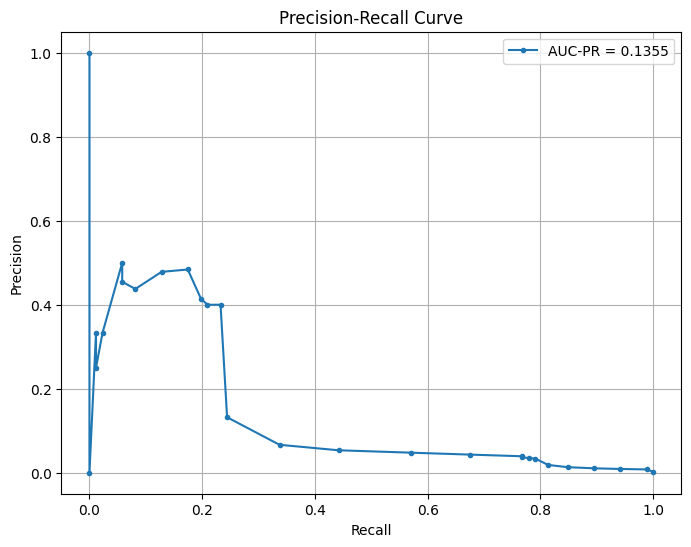

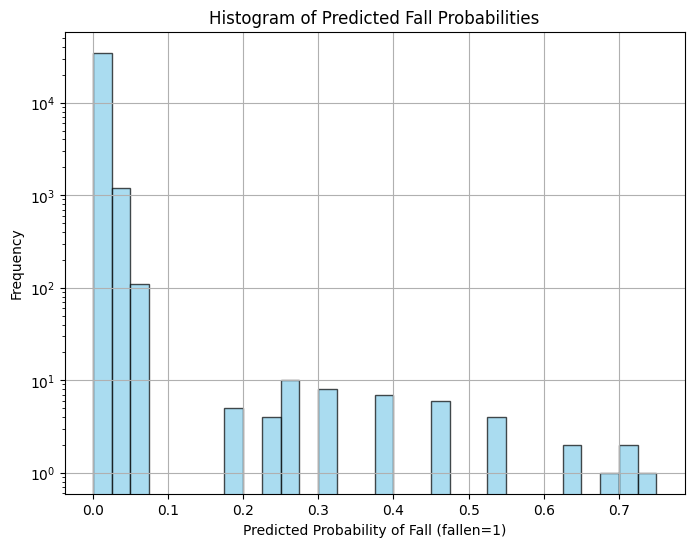

Best Threshold for Precision-Recall Balance: 0.1875


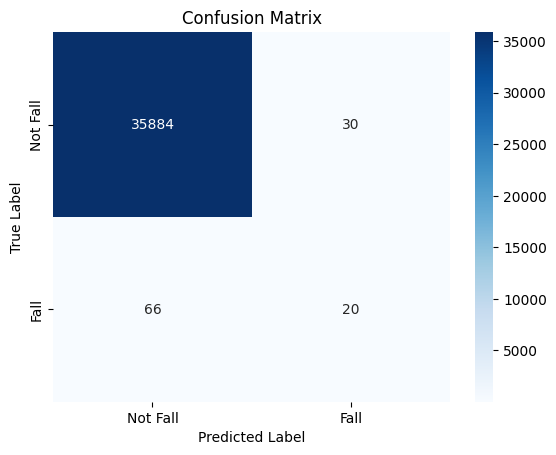

Top 10 Important Features:
                         Feature  Importance
4           fall-while_stay_True    0.533919
8       transfer-impairment_True    0.314894
0                            age    0.148369
2                      fall-risk    0.002818
1    fall-how_many_last_12_month    0.000000
3          fall-while_stay_False    0.000000
5        fall-while_stay_Unknown    0.000000
6      transfer-impairment_False    0.000000
7    transfer-impairment_Unknown    0.000000
9  bed_mobility-impairment_False    0.000000


In [45]:
decision_tree_pipeline(df1)

### Erstes Modell mit Dummy für Fall Risk

In [ ]:
train_columns = ["id", "age", "fall-how_many_last_12_month", "fall-risk_Unknown", "fall-risk_+", "fall-risk_++", "fall-risk_0", "fall-while_stay_False","fall-while_stay_True", "fall-while_stay_Unknown", "transfer-impairment_False","transfer-impairment_Unknown", "transfer-impairment_True","bed_mobility-impairment_False", "bed_mobility-impairment_True", "bed_mobility-impairment_Unknown", "fall-how_many_last_12_month_missing", "fallen"]
df1 = df[train_columns]

In [148]:
df1.head()

,id,age,fall-how_many_last_12_month,fall-risk_Unknown,fall-risk_+,fall-risk_++,fall-risk_0,fall-while_stay_False,fall-while_stay_True,fall-while_stay_Unknown,transfer-impairment_False,transfer-impairment_Unknown,transfer-impairment_True,bed_mobility-impairment_False,bed_mobility-impairment_True,bed_mobility-impairment_Unknown,fall-how_many_last_12_month_missing,fallen
0,179020,39,5.0,True,False,False,False,False,False,True,True,False,False,False,False,True,1,False
1,112009,29,1.0,True,False,False,False,False,False,True,False,True,False,False,False,True,1,False
2,54403,29,1.0,False,False,False,True,False,False,True,False,True,False,False,False,True,1,False
3,13054,64,1.0,False,False,False,True,False,False,True,True,False,False,False,False,True,1,False
4,45770,89,1.0,True,False,False,False,False,False,True,False,True,False,False,False,True,1,False


In [149]:

# Define target and features
X = df1.drop(columns=["fallen", "id"])  # Exclude target
y = df1["fallen"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
print(f"Train accuracy: {clf.score(X_train, y_train):.3f}")
print(f"Test accuracy: {clf.score(X_test, y_test):.3f}")

Train accuracy: 0.998
Test accuracy: 0.998


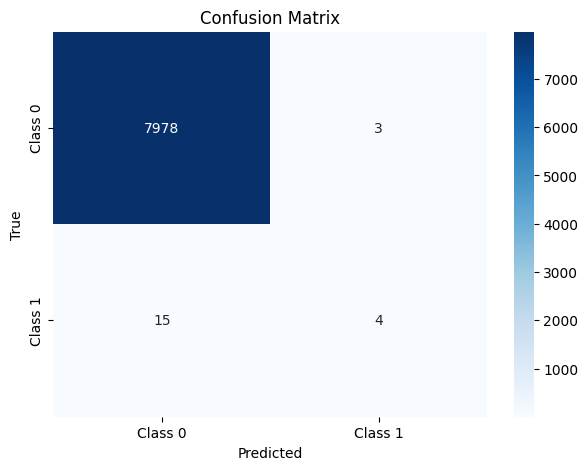

In [150]:
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [151]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7981
        True       0.57      0.21      0.31        19

    accuracy                           1.00      8000
   macro avg       0.78      0.61      0.65      8000
weighted avg       1.00      1.00      1.00      8000



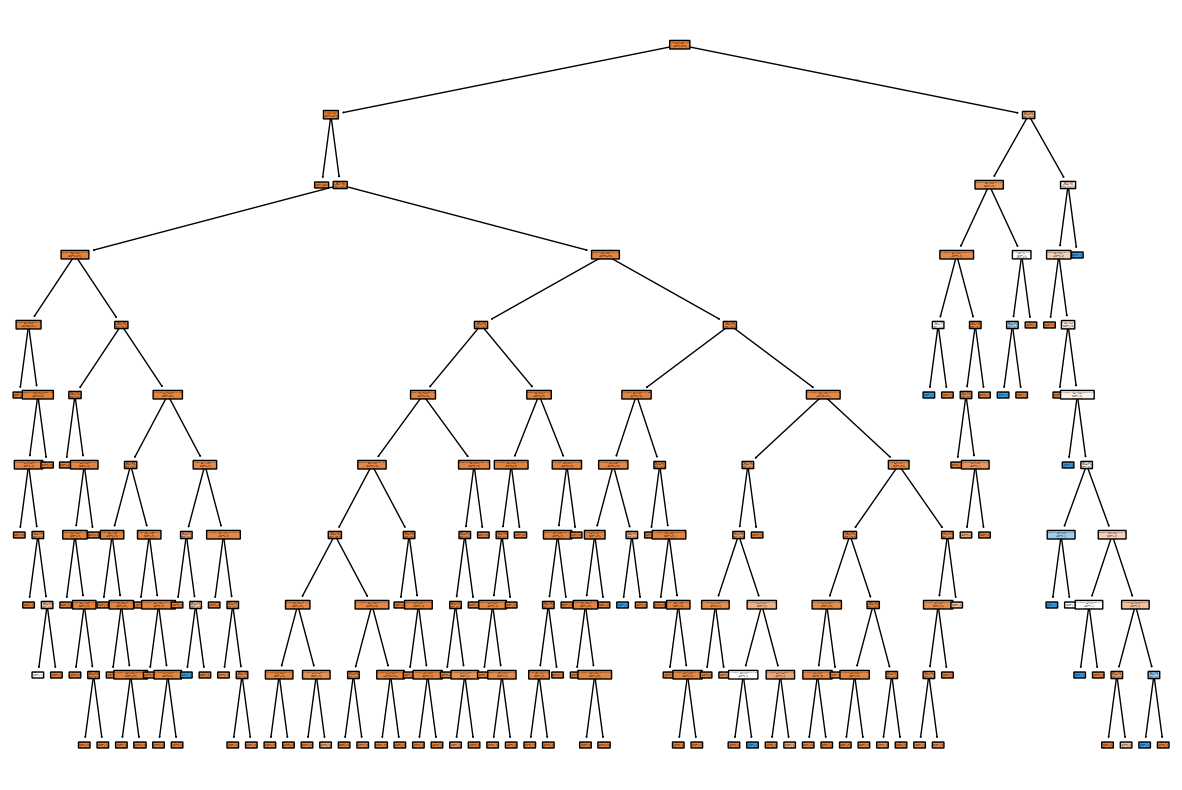

In [142]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X_test.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()

In [144]:
# Get the decision rules as text
tree_rules = export_text(clf, feature_names=list(X_test.columns))

print(tree_rules)

|--- fall-while_stay_True <= 0.50
|   |--- fall-risk_+ <= 0.50
|   |   |--- class: False
|   |--- fall-risk_+ >  0.50
|   |   |--- age <= 72.50
|   |   |   |--- bed_mobility-impairment_True <= 0.50
|   |   |   |   |--- transfer-impairment_False <= 0.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- transfer-impairment_False >  0.50
|   |   |   |   |   |--- bed_mobility-impairment_Unknown <= 0.50
|   |   |   |   |   |   |--- fall-how_many_last_12_month <= 4.33
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- fall-how_many_last_12_month >  4.33
|   |   |   |   |   |   |   |--- age <= 54.00
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- age >  54.00
|   |   |   |   |   |   |   |   |--- age <= 66.50
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- age >  66.50
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- bed_mobility-impairment_Unknown >  0.5

In [155]:
y_probs = clf.predict_proba(X_test)[:, 1]  # Probabilities for class "fallen=1"

In [156]:
high_risk_patients = X_test.copy()
high_risk_patients["predicted_prob"] = y_probs
high_risk_patients["actual_fallen"] = y_test.values  # Add actual outcome for comparison
high_risk_patients["id"] = df1.loc[X_test.index, "id"]  # Restore patient IDs


In [157]:
high_risk_patients.head()

,age,fall-how_many_last_12_month,fall-risk_Unknown,fall-risk_+,fall-risk_++,fall-risk_0,fall-while_stay_False,fall-while_stay_True,fall-while_stay_Unknown,transfer-impairment_False,transfer-impairment_Unknown,transfer-impairment_True,bed_mobility-impairment_False,bed_mobility-impairment_True,bed_mobility-impairment_Unknown,fall-how_many_last_12_month_missing,predicted_prob,actual_fallen,id
32823,69,1.0,True,False,False,False,False,False,True,False,True,False,False,False,True,1,0.0,False,623831
16298,49,1.0,True,False,False,False,True,False,False,False,True,False,True,False,False,0,0.0,False,399934
28505,44,5.0,False,False,False,True,False,False,True,False,True,False,False,False,True,1,0.0,False,399011
6689,79,5.0,True,False,False,False,False,False,True,False,True,False,False,False,True,1,0.0,False,72344
26893,84,1.0,True,False,False,False,False,False,True,False,True,False,False,False,True,1,0.0,False,302038


In [165]:
threshold = 0.2  # Define high-risk threshold
high_risk_cases = high_risk_patients[high_risk_patients["predicted_prob"] >= threshold]
actual_fall_rate = high_risk_cases["actual_fallen"].mean()  # Proportion of actual falls
print(f"Among high-risk patients (prob >= {threshold}), {actual_fall_rate:.2%} actually fell.")

Among high-risk patients (prob >= 0.2), 50.00% actually fell.


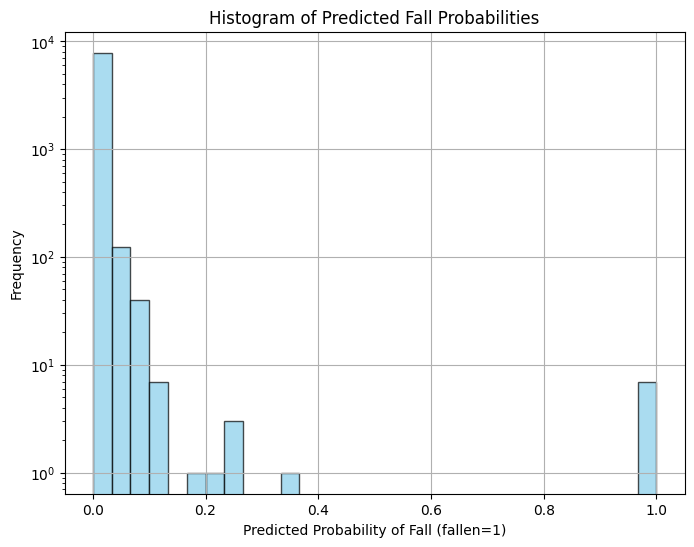

In [164]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(y_probs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Predicted Fall Probabilities")
plt.xlabel("Predicted Probability of Fall (fallen=1)")
plt.ylabel("Frequency")

# Apply logarithmic scale to y-axis
plt.yscale('log')
plt.grid(True)
plt.show()

In [166]:
feature_importances = clf.feature_importances_

# Create a DataFrame for easier visualization
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display the most important features
print(importance_df)

                                Feature  Importance
0                                   age    0.410728
7                  fall-while_stay_True    0.170883
1           fall-how_many_last_12_month    0.156170
3                           fall-risk_+    0.070738
15  fall-how_many_last_12_month_missing    0.048814
12        bed_mobility-impairment_False    0.038638
11             transfer-impairment_True    0.034900
13         bed_mobility-impairment_True    0.026633
2                     fall-risk_Unknown    0.016860
10          transfer-impairment_Unknown    0.007245
6                 fall-while_stay_False    0.007237
8               fall-while_stay_Unknown    0.005395
9             transfer-impairment_False    0.003147
14      bed_mobility-impairment_Unknown    0.002613
4                          fall-risk_++    0.000000
5                           fall-risk_0    0.000000


It seems reasonable at this point to drop fall-risk_++ and fall-risk_0 as they have no true cases for fallen=1.
You have evidence here that the correlation analysis yielded kind of misleading results right?

### Expirement for Dropping some of the variables

In [ ]:
train_columns = ["id", "age", "fall-how_many_last_12_month", "fall-risk_Unknown", "fall-risk_+", "fall-while_stay_False","fall-while_stay_True", "fall-while_stay_Unknown", "transfer-impairment_False","transfer-impairment_Unknown", "transfer-impairment_True","bed_mobility-impairment_False", "bed_mobility-impairment_True", "bed_mobility-impairment_Unknown", "fall-how_many_last_12_month_missing", "fallen"]
df1 = df[train_columns]
df1.head()

# Define target and features
X = df1.drop(columns=["fallen", "id"])  # Exclude target
y = df1["fallen"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

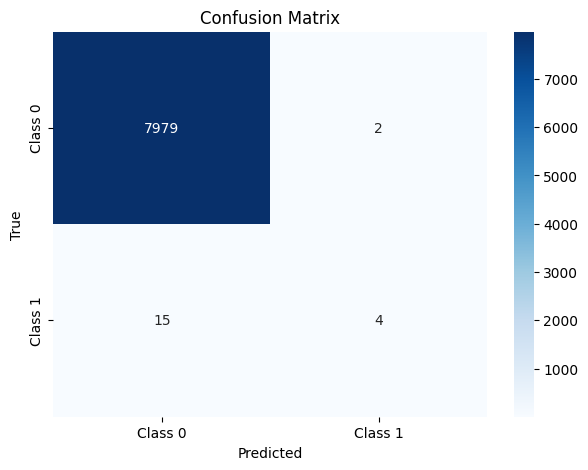

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7981
        True       0.67      0.21      0.32        19

    accuracy                           1.00      8000
   macro avg       0.83      0.61      0.66      8000
weighted avg       1.00      1.00      1.00      8000



In [168]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
report = classification_report(y_test, y_pred)
print(report)


In [170]:
y_probs = clf.predict_proba(X_test)[:, 1]  # Probabilities for class "fallen=1"
high_risk_patients = X_test.copy()
high_risk_patients["predicted_prob"] = y_probs
high_risk_patients["actual_fallen"] = y_test.values  # Add actual outcome for comparison
high_risk_patients["id"] = df1.loc[X_test.index, "id"]  # Restore patient IDs


threshold = 0.5  # Define high-risk threshold
high_risk_cases = high_risk_patients[high_risk_patients["predicted_prob"] >= threshold]
actual_fall_rate = high_risk_cases["actual_fallen"].mean()  # Proportion of actual falls
print(f"Among high-risk patients (prob >= {threshold}), {actual_fall_rate:.2%} actually fell.")

Among high-risk patients (prob >= 0.5), 66.67% actually fell.


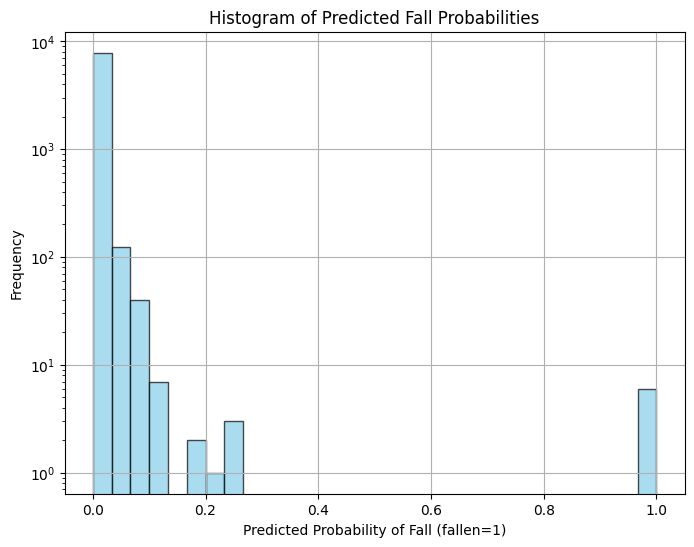

In [171]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(y_probs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Predicted Fall Probabilities")
plt.xlabel("Predicted Probability of Fall (fallen=1)")
plt.ylabel("Frequency")

# Apply logarithmic scale to y-axis
plt.yscale('log')
plt.grid(True)
plt.show()


In [172]:
feature_importances = clf.feature_importances_
# Create a DataFrame for easier visualization
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display the most important features
print(importance_df)

                                Feature  Importance
0                                   age    0.387325
5                  fall-while_stay_True    0.172335
1           fall-how_many_last_12_month    0.092583
3                           fall-risk_+    0.088343
10        bed_mobility-impairment_False    0.072671
13  fall-how_many_last_12_month_missing    0.049836
11         bed_mobility-impairment_True    0.039939
4                 fall-while_stay_False    0.037620
9              transfer-impairment_True    0.027143
12      bed_mobility-impairment_Unknown    0.018294
8           transfer-impairment_Unknown    0.010113
7             transfer-impairment_False    0.003174
6               fall-while_stay_Unknown    0.000624
2                     fall-risk_Unknown    0.000000


This worked better. One case misclassified is now gone. A new variable has now probability zero.

#### Automation of feature selection with RFE

In [174]:
rfe = RFE(estimator=DecisionTreeClassifier(max_depth=10), n_features_to_select=10)  # Specify number of features to keep
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Train model on the reduced set of features
clf_rfe = DecisionTreeClassifier(max_depth=10)
clf_rfe.fit(X_train_rfe, y_train)

DecisionTreeClassifier(max_depth=10)

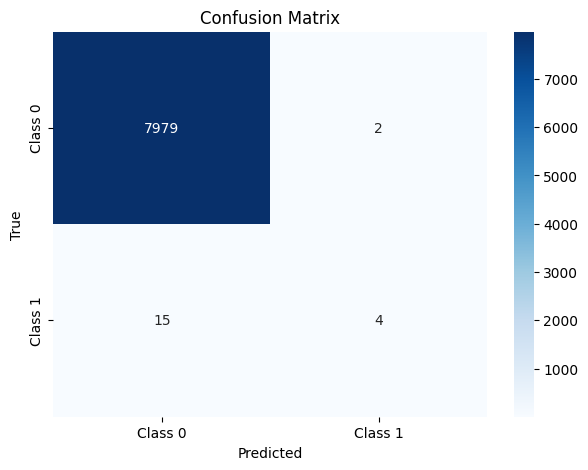

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7981
        True       0.67      0.21      0.32        19

    accuracy                           1.00      8000
   macro avg       0.83      0.61      0.66      8000
weighted avg       1.00      1.00      1.00      8000



In [175]:
# Transform X_test using RFE (same transformation as for the training set)
X_test_rfe = rfe.transform(X_test)

# Get predictions
y_pred = clf_rfe.predict(X_test_rfe)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

In [177]:
# Get the mask of selected features
selected_features = X.columns[rfe.support_]

# Display the selected features
print("Selected features:", selected_features)

Selected features: Index(['age', 'fall-how_many_last_12_month', 'fall-risk_+',
       'fall-while_stay_True', 'fall-while_stay_Unknown',
       'transfer-impairment_True', 'bed_mobility-impairment_False',
       'bed_mobility-impairment_True', 'bed_mobility-impairment_Unknown',
       'fall-how_many_last_12_month_missing'],
      dtype='object')


train rf

Check whether Ordinal works better

Build same model but add the other good variables, e.g. walk-imapirment, excretions ...

Check for feature Engineering: Maybe bed-mobility-impairment and transfer-impairment both have to be true.
Check for other Unknown variables. Unknown should have strong bias for non-fallers. Maybe something in your understanding is off.
Try combinations for "something is off with excretions"